In [2]:
%%capture
!pip install koreanize-matplotlib
import koreanize_matplotlib

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
chicago = pd.read_csv('/content/drive/MyDrive/final_csv/최종데이터/최종데이터/chicago_crime_final.csv')

In [6]:
chicago.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'geometry', 'Community Area Name', 'F_Date', 'Time'],
      dtype='object')

In [8]:
chicago.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,geometry,Community Area Name,F_Date,Time
0,6255892,HP342049,2008-05-17 18:00:00,101XX S LAFAYETTE AVE,031A,ROBBERY,ARMED - HANDGUN,RESIDENCE,False,False,...,1837726.0,2008,01/19/2024 03:40:50 PM,41.710040,-87.624796,"(41.710039855, -87.62479561)",POINT (-87.62479561 41.710039855),Roseland,2008-05-17,18:00:00
1,6272641,HP358387,2008-05-27 01:00:00,105XX S PERRY AVE,0320,ROBBERY,STRONG ARM - NO WEAPON,STREET,False,True,...,1835161.0,2008,01/19/2024 03:40:50 PM,41.703007,-87.625785,"(41.703006756, -87.625784664)",POINT (-87.625784664 41.703006756),Roseland,2008-05-27,01:00:00
2,6438609,HP496499,2008-08-05 22:37:00,126XX S UNION AVE,031A,ROBBERY,ARMED - HANDGUN,SCHOOL - PUBLIC GROUNDS,False,False,...,1821073.0,2008,01/19/2024 03:40:50 PM,41.664425,-87.639053,"(41.664425476, -87.639053139)",POINT (-87.639053139 41.664425476),West Pullman,2008-08-05,22:37:00
3,6680276,HP754070,2008-12-27 20:00:00,058XX N MANTON AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE - GARAGE,False,False,...,1938474.0,2008,01/19/2024 03:40:50 PM,41.987326,-87.770650,"(41.9873259, -87.770650405)",POINT (-87.770650405 41.9873259),Jefferson Park,2008-12-27,20:00:00
4,12536164,JE439378,2015-09-24 00:00:00,031XX W 53RD PL,1753,OFFENSE INVOLVING CHILDREN,SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER,APARTMENT,False,True,...,1868986.0,2015,09/14/2023 03:41:59 PM,41.796278,-87.702253,"(41.796278388, -87.702253422)",POINT (-87.702253422 41.796278388),Gage Park,2015-09-24,00:00:00


In [7]:
c_name = pd.read_csv('/content/drive/MyDrive/final_csv/community_areas_final.csv')

In [15]:
c_name.columns

Index(['Community Area', 'name', 'population', 'income', 'requests', 'latinos',
       'blacks', 'white', 'asian', 'other'],
      dtype='object')

In [9]:
c_name.head()

,Community Area,name,population,income,requests,latinos,blacks,white,asian,other
0,1,Rogers Park,54991,39482,3204.888073,0.244,0.263,0.393,0.064,0.036
1,2,West Ridge,71942,47323,3906.341219,0.204,0.111,0.427,0.225,0.032
2,3,Uptown,56362,40324,2164.046698,0.142,0.200,0.516,0.114,0.028
3,4,Lincoln Square,39493,57749,3827.260527,0.191,0.038,0.631,0.111,0.029
4,5,North Center,31867,81524,5307.998870,0.136,0.023,0.773,0.045,0.022


In [6]:
crime_by_area = chicago.groupby('Community Area').size().reset_index(name='Crime Count')

In [9]:
crime_by_area['Community Area'] = crime_by_area['Community Area'].astype(int)
merge_crime_by_area = pd.merge(crime_by_area, c_name, how='left', on='Community Area')
merge_crime_by_area.head()

# Crime Rate가 높은 순으로 정렬하여 표시
merge_crime_by_area['Crime Rate'] = merge_crime_by_area['Crime Count'] / merge_crime_by_area['population']

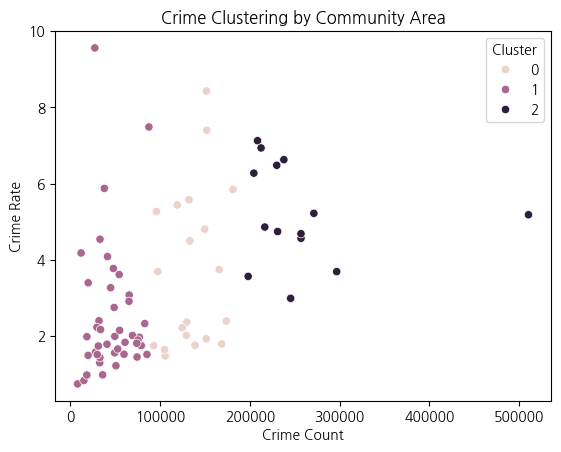

In [11]:
from sklearn.cluster import KMeans
crime_features = merge_crime_by_area[['Crime Count', 'Crime Rate']]
kmeans = KMeans(n_clusters=3)
merge_crime_by_area['Cluster'] = kmeans.fit_predict(crime_features)
sns.scatterplot(x='Crime Count', y='Crime Rate', hue='Cluster', data=merge_crime_by_area)
plt.title('Crime Clustering by Community Area')
plt.show()

In [14]:
import plotly.express as px

fig = px.scatter(
    merge_crime_by_area,
    x="Crime Count",
    y="Crime Rate",
    color="Cluster",
    hover_name="name",
    title="Crime Clustering by Community Area (Interactive)"
)

fig.show()

- Cluster 0 (중간 범죄율 & 중간 범죄 건수) → 일반적인 수준의 지역

- Cluster 1 (높은 범죄율 & 높은 범죄 건수) → 위험 지역

- Cluster 2 (낮은 범죄율 & 낮은 범죄 건수) → 비교적 안전한 지역

### 강력범죄 기준 클러스터링

In [22]:
violent_crimes = [
    "HOMICIDE", "CRIMINAL SEXUAL ASSAULT", "ROBBERY", "BATTERY", "RITUALISM",
    "ASSAULT", "BURGLARY", "THEFT", "MOTOR VEHICLE THEFT", "HUMAN TRAFFICKING", "ARSON"
]
violent_df = chicago[chicago['Primary Type'].isin(violent_crimes)]

In [23]:
violent_by_area = violent_df.groupby('Community Area').size().reset_index(name='Violent Count')
violent_by_area['Community Area'] = violent_by_area['Community Area'].astype(int)

# 병합 (인구 데이터 있는 테이블과)
violent_merge = pd.merge(violent_by_area, c_name, how='left', on='Community Area')
violent_merge['Violent Rate'] = violent_merge['Violent Count'] / violent_merge['population']

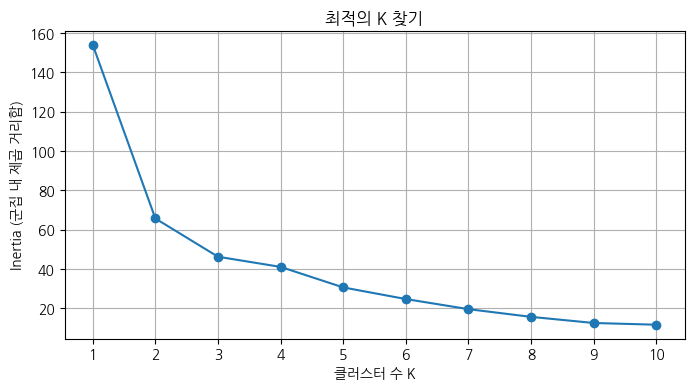

In [62]:
inertia = []
scaled = StandardScaler().fit_transform(violent_merge[['Violent Count', 'Violent Rate']])

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled)
    inertia.append(kmeans.inertia_)

# 시각화
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('최적의 K 찾기')
plt.xlabel('클러스터 수 K')
plt.ylabel('Inertia (군집 내 제곱 거리합)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
scaled = scaler.fit_transform(violent_merge[['Violent Count', 'Violent Rate']])
violent_merge['Cluster_Scaled'] = KMeans(n_clusters=2, random_state=42).fit_predict(scaled)

In [66]:
violent_merge.groupby('Cluster_Scaled')[['Violent Count', 'Violent Rate']].mean()

,Violent Count,Violent Rate
Cluster_Scaled,,
0,115421.62963,3.291348
1,38115.20000,1.294295


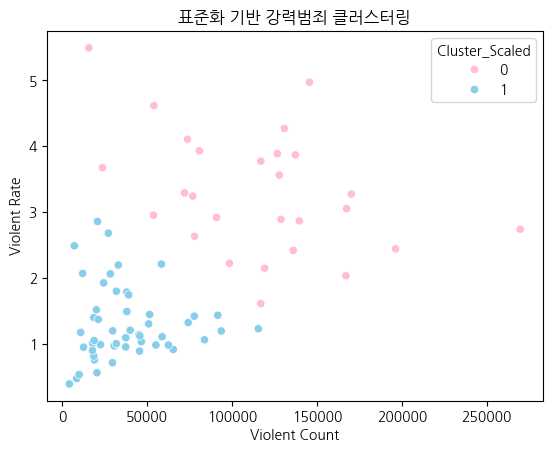

In [67]:
sns.scatterplot(
    data=violent_merge,
    x='Violent Count',
    y='Violent Rate',
    hue='Cluster_Scaled',
    palette={0: 'pink', 1: 'skyblue'}
)
plt.title('표준화 기반 강력범죄 클러스터링')
plt.show()

In [77]:
# 클러스터 0 (고위험 지역) 필터링
high_risk_areas_violent = severe_merge[violent_merge['Cluster_Scaled'] == 0]

# 지역 이름(name)만 리스트로 추출
high_risk_areas_violent_list = high_risk_areas_violent['name'].tolist()

In [78]:
high_risk_areas_violent_list

['Near North Side',
 'Logan Square',
 'Humboldt Park',
 'West Town',
 'Austin',
 'West Garfield Park',
 'East Garfield Park',
 'Near West Side',
 'North Lawndale',
 'Loop',
 'Douglas',
 'Fuller Park',
 'Grand Boulevard',
 'Washington Park',
 'Woodlawn',
 'South Shore',
 'Chatham',
 'South Chicago',
 'Roseland',
 'West Pullman',
 'Riverdale',
 'New City',
 'Chicago Lawn',
 'West Englewood',
 'Englewood',
 'Greater Grand Crossing',
 'Auburn Gresham']

### 위험 범죄 기준 클러스터링

In [27]:
def is_violent_crime(row):
    primary = row['Primary Type']
    description = str(row['Description']).upper()

    if primary in ['HOMICIDE', 'CRIMINAL SEXUAL ASSAULT', 'ROBBERY', 'HUMAN TRAFFICKING']:
        return True
    elif primary in ['ASSAULT', 'BATTERY', 'ARSON'] and 'AGGRAVATED' in description:
        return True
    else:
        return False

chicago['IsViolent'] = chicago.apply(is_violent_crime, axis=1)

In [28]:
# 위험범죄만 필터링
severe_crime_df = chicago[chicago['IsViolent']]

In [30]:
# 1. 위험범죄 건수 by Community Area
severe_by_area = severe_crime_df.groupby('Community Area').size().reset_index(name='Severe Count')
severe_by_area['Community Area'] = severe_by_area['Community Area'].astype(int)

# 2. 인구와 병합 + 비율
severe_merge = pd.merge(severe_by_area, c_name, how='left', on='Community Area')
severe_merge['Severe Rate'] = severe_merge['Severe Count'] / severe_merge['population']

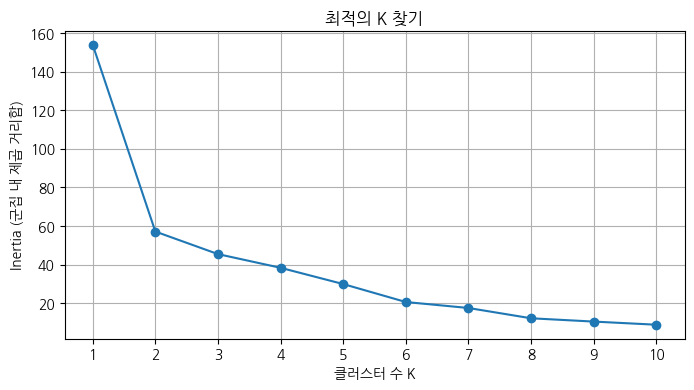

In [46]:
inertia = []
scaled = StandardScaler().fit_transform(severe_merge[['Severe Count', 'Severe Rate']])

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled)
    inertia.append(kmeans.inertia_)

# 시각화
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('최적의 K 찾기')
plt.xlabel('클러스터 수 K')
plt.ylabel('Inertia (군집 내 제곱 거리합)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [47]:
from sklearn.metrics import silhouette_score

K=2, Silhouette Score=0.6147
K=3, Silhouette Score=0.5567
K=4, Silhouette Score=0.5440
K=5, Silhouette Score=0.3551
K=6, Silhouette Score=0.3649
K=7, Silhouette Score=0.3737
K=8, Silhouette Score=0.4052
K=9, Silhouette Score=0.3962
K=10, Silhouette Score=0.4127


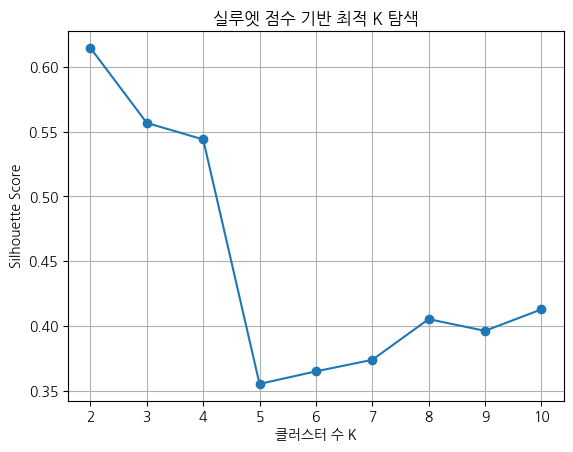

In [48]:
# Silhouette Score 저장용 리스트
silhouette_scores = []

# K 값을 2부터 10까지 반복하며 클러스터링 & 점수 계산
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled)  # scaled는 StandardScaler로 정규화된 데이터
    score = silhouette_score(scaled, labels)
    silhouette_scores.append(score)
    print(f"K={k}, Silhouette Score={score:.4f}")

# 결과 시각화
plt.plot(K_range, silhouette_scores, marker='o')
plt.title('실루엣 점수 기반 최적 K 탐색')
plt.xlabel('클러스터 수 K')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

-> 클러스터링 k 값이 2가 적절해 보임 위에 다시 적용

**Severe Count**	: 한 지역에서 발생한 강력범죄의 총 건수 (절대 수치)<br>
**Severe Rate**	  : 해당 지역 인구수 대비 강력범죄율 (상대 위험)<br>

건수가 많거나 적다고 무조건 위험하다/ 위험하지 않다로 나뉠 경우의 **왜곡발생 방지**

In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
scaled = scaler.fit_transform(severe_merge[['Severe Count', 'Severe Rate']])
severe_merge['Cluster_Scaled'] = KMeans(n_clusters=2, random_state=42).fit_predict(scaled)

In [69]:
severe_merge.groupby('Cluster_Scaled')[['Severe Count', 'Severe Rate']].mean()

,Severe Count,Severe Rate
Cluster_Scaled,,
0,19671.909091,0.621477
1,5030.381818,0.161490


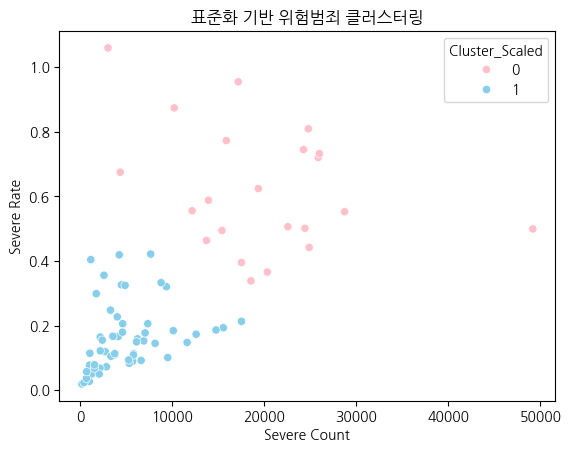

In [70]:
sns.scatterplot(
    data=severe_merge,
    x='Severe Count',
    y='Severe Rate',
    hue='Cluster_Scaled',
    palette={0: 'pink', 1: 'skyblue'}
)
plt.title('표준화 기반 위험범죄 클러스터링')
plt.show()


- 0 (핑크색)**고위험 지역**<br>
→ 강력범죄 건수(Severe Count)와 인구 대비 강력범죄율(Severe Rate) 모두 높은 지역
→ 범죄도 많고 인구 대비 비율도 높아서 집중 대응 필요

- 1 (하늘색)	**일반 또는 저위험 지역**<br>
→ 강력범죄 수나 비율이 상대적으로 낮음
→ 위험도가 비교적 낮은 군집

In [52]:
# 클러스터별 지역 이름 목록 정리
for cluster_id in sorted(severe_merge['Cluster_Scaled'].unique()):
    print(f"\n📍 Cluster {cluster_id} 지역 목록")
    area_list = severe_merge[severe_merge['Cluster_Scaled'] == cluster_id]['name'].tolist()
    for area in area_list:
        print(f"- {area}")


📍 Cluster 0 지역 목록
- Humboldt Park
- Austin
- West Garfield Park
- East Garfield Park
- Near West Side
- North Lawndale
- Fuller Park
- Grand Boulevard
- Washington Park
- Woodlawn
- South Shore
- Chatham
- South Chicago
- Roseland
- West Pullman
- Riverdale
- New City
- Chicago Lawn
- West Englewood
- Englewood
- Greater Grand Crossing
- Auburn Gresham

📍 Cluster 1 지역 목록
- Rogers Park
- West Ridge
- Uptown
- Lincoln Square
- North Center
- Lake View
- Lincoln Park
- Near North Side
- Edison Park
- Norwood Park
- Jefferson Park
- Forest Glen
- North Park
- Albany Park
- Portage Park
- Irving Park
- Dunning
- Montclare
- Belmont Cragin
- Hermosa
- Avondale
- Logan Square
- West Town
- South Lawndale
- Lower West Side
- Loop
- Near South Side
- Armour Square
- Douglas
- Oakland
- Kenwood
- Hyde Park
- Avalon Park
- Burnside
- Calumet Heights
- Pullman
- South Deering
- East Side
- Hegewisch
- Garfield Ridge
- Archer Heights
- Brighton Park
- McKinley Park
- Bridgeport
- West Elsdon
- Gag

In [53]:
# 클러스터 0 (고위험 지역) 필터링
high_risk_areas = severe_merge[severe_merge['Cluster_Scaled'] == 0]

# 지역 이름(name)만 리스트로 추출
high_risk_list = high_risk_areas['name'].tolist()

In [60]:
high_risk_list

['Humboldt Park',
 'Austin',
 'West Garfield Park',
 'East Garfield Park',
 'Near West Side',
 'North Lawndale',
 'Fuller Park',
 'Grand Boulevard',
 'Washington Park',
 'Woodlawn',
 'South Shore',
 'Chatham',
 'South Chicago',
 'Roseland',
 'West Pullman',
 'Riverdale',
 'New City',
 'Chicago Lawn',
 'West Englewood',
 'Englewood',
 'Greater Grand Crossing',
 'Auburn Gresham']

### 강력범죄와 위험범죄 클러스터링 결과 비교

violent: 강력범죄기준

severe: 강력범죄에서 재산범죄 제외 신체적 위협이 큰 범죄 묶음

- 강력범죄 위험지역

In [76]:
len(high_risk_areas_violent)

27

- 위험범죄 위험지역

In [80]:
len(high_risk_areas)

22

In [89]:
violent_merge.columns

Index(['Community Area', 'Violent Count', 'name', 'population', 'income',
       'requests', 'latinos', 'blacks', 'white', 'asian', 'other',
       'Violent Rate', 'Cluster', 'Cluster_Scaled'],
      dtype='object')

In [90]:
# 필요한 열만 추출해서 정렬
cluster_table = violent_merge[['name', 'Community Area', 'Cluster_Scaled']].sort_values(by='Cluster_Scaled')

cluster_table_2 = severe_merge[['name', 'Community Area', 'Cluster_Scaled']].sort_values(by='Cluster_Scaled')

In [91]:
# 공통 컬럼 기준 병합 ('Community Area')
comparison_df = pd.merge(
    cluster_table,          # 강력범죄 기준
    cluster_table_2,        # 위험범죄 기준
    on='Community Area',
    suffixes=('_Violent', '_Severe')
)

In [92]:
# 두 클러스터가 같은지 확인
comparison_df['Same Cluster'] = comparison_df['Cluster_Scaled_Violent'] == comparison_df['Cluster_Scaled_Severe']

In [95]:
# 차이 있는 지역만 보여줄 때는 아래처럼 한 줄로!
comparison_df[comparison_df['Same Cluster'] == False][
    ['Community Area', 'name_Violent', 'Cluster_Scaled_Violent', 'Cluster_Scaled_Severe', 'Same Cluster']
]

,Community Area,name_Violent,Cluster_Scaled_Violent,Cluster_Scaled_Severe,Same Cluster
0,8,Near North Side,0,1,False
5,22,Logan Square,0,1,False
6,24,West Town,0,1,False
7,32,Loop,0,1,False
15,35,Douglas,0,1,False


이 지역들은 일반적 범죄 빈도는 높지만,
시민 안전을 위협하는 심각한 범죄는 적은 편

범죄예방보다 예방적 순찰이나 CCTV 강화가 더 적절할 수도 있음